# Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.utils.np_utils import to_categorical

np.random.seed(0)

# Data

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# downloads the MNIST dataset containing images and corresponding labels

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# shows dimensions of our data
# x data are our 60000 images
## which are 28 by 28 matrices with numbers matching the grey scale value of the pixels
# y data are our labels for the corresponding image

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualisation

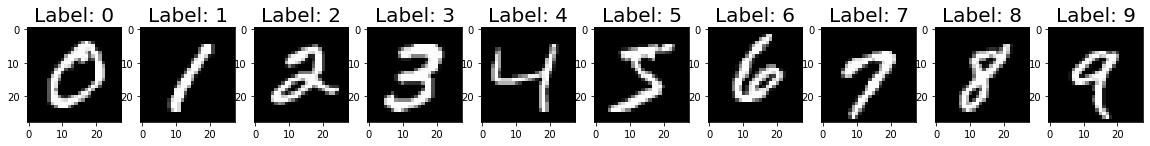

In [10]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=20)

In [21]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# converts the data from float to vectors so that the neural net
# classifies them into one category rather than giving something like 7.8

# Normalize and Prepare Data

In [23]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# Normalize data so we have a common scale and dont distort ranges of values

In [24]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

# Reshape data so that we can pass one long vextor to network as first input row

(60000, 784)


# Create Network

In [25]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
# use ReLu as computationally efficient and allows backpropogation
# use two hidden layers with 128 neurons each (trial and error shows good fit)

model.add(Dropout(0.25))
# randomly deactivate 25% of neurans to make net robust against overfitting

model.add(Dense(units=10, activation='softmax'))
# gives us the probability of each class using softmax function

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# how we calculate how close our network is to the true answer
# and make adjustments with backpropogation accordingly

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [26]:
batch_size=1000
epochs=10
model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
60/60 [==============================] - 2s 17ms/step - loss: 0.8205 - accuracy: 0.7590
Epoch 2/10
60/60 [==============================] - 1s 17ms/step - loss: 0.2818 - accuracy: 0.9178
Epoch 3/10
60/60 [==============================] - 1s 17ms/step - loss: 0.2091 - accuracy: 0.9383
Epoch 4/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1672 - accuracy: 0.9504
Epoch 5/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1398 - accuracy: 0.9583
Epoch 6/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1196 - accuracy: 0.9654
Epoch 7/10
60/60 [==============================] - 1s 17ms/step - loss: 0.1057 - accuracy: 0.9687
Epoch 8/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0951 - accuracy: 0.9722
Epoch 9/10
60/60 [==============================] - 1s 18ms/step - loss: 0.0830 - accuracy: 0.9755
Epoch 10/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0743 - accuracy: 0.9781


# Test

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: {}, Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9742
Loss: 0.08232433348894119, Accuracy: 0.9742000102996826


Final accuracy for unseen data is 97.4%